In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy

In [2]:
# from calibration_util import *
from calibration_vhos_util import *

# Check vhos calibration method with flipped image

In [17]:
fn = '../data/flipped_images/images_20m_wait_17_ave.fits'
i_amp = 0

image, nrows, ncols, nsamp, hos_start, vos_start, _ = _get_image(fn)
# vos_start = 512
# hos_start = 3080
ss_os_slice = slice(hos_start, 3200)
ms_os_slice = slice(ss_os_slice.stop, ncols)
ms_slices = [slice(1000, 1050)]
ss_slices = [slice(0, ms_slices[0].start), slice(ms_slices[0].stop, hos_start)]


In [22]:
v_image = calibrate_image(fn, 'v', ss_os_slice, ms_os_slice, ss_slices, ms_slices)
h_image = calibrate_image(fn, 'h', ss_os_slice, ms_os_slice, ss_slices, ms_slices)
vh_image = calibrate_image(fn, 'vh', ss_os_slice, ms_os_slice, ss_slices, ms_slices)

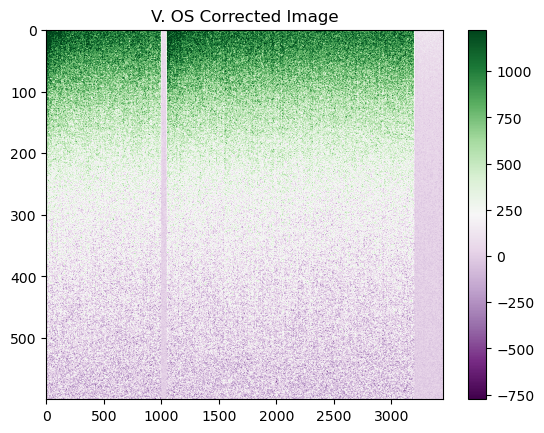

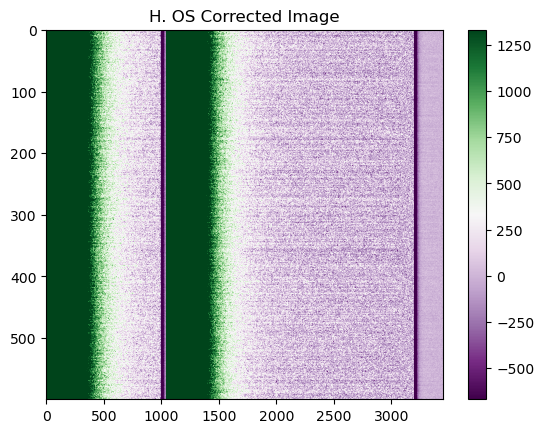

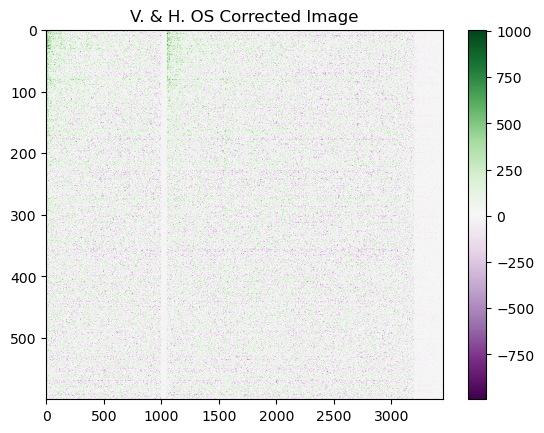

In [23]:
plot_image(v_image[0], 1000, title='V. OS Corrected Image')
plot_image(h_image[0], 1000, title='H. OS Corrected Image')
plot_image(vh_image[0], 1000, title='V. & H. OS Corrected Image')


# Check vhos calibration method with dark, forward image

# Check vhos calibration method with exposed image

In [6]:
image_path = '../data/dark_images_090723/image_mid_long_N300_2_ave.fits'

In [6]:


# with open('./light_calibration_image_090523_2.pkl', 'rb') as handle:
#     light_calibration_image = pickle.load(handle)  
image = pickle.load(open('./outdir_images_no_wait_mid_long_forward/image_no_wait_mid_long_forward.pkl', 'rb'))[15]
light_calibration_image = fits.open('./images/lta1/images_no_wait_mid_long_forward/image_light_calibration_090523_10.fz')[1].data
light_calibration_image = doHOS_simple(light_calibration_image.astype(np.float64), hos_start)

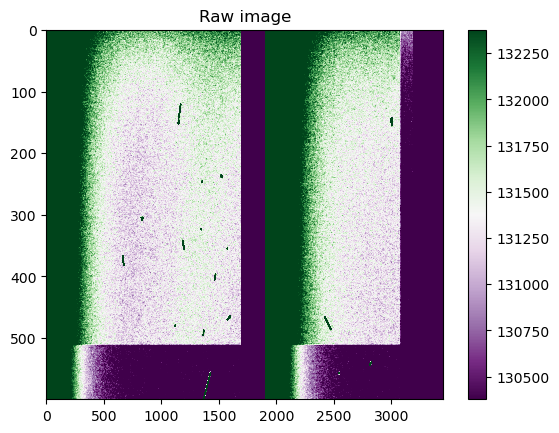

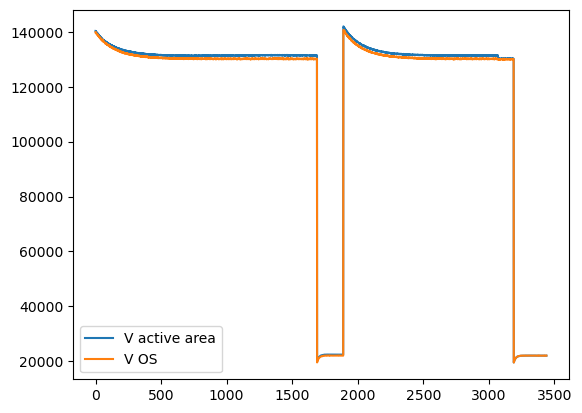

In [9]:
_ = image
plot_image(_, 1000, title='Raw image')
plt.plot(np.median(_[:vos_start], axis=0)[10:], label='V active area')
plt.plot(np.median(_[vos_start:], axis=0)[10:], label='V OS')
plt.legend();

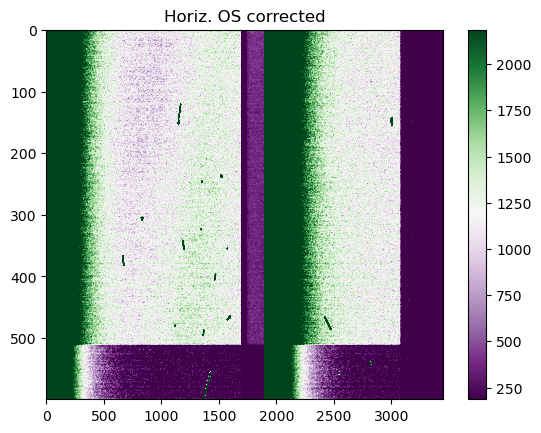

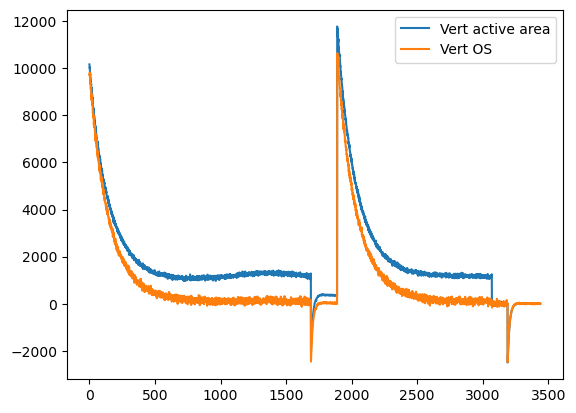

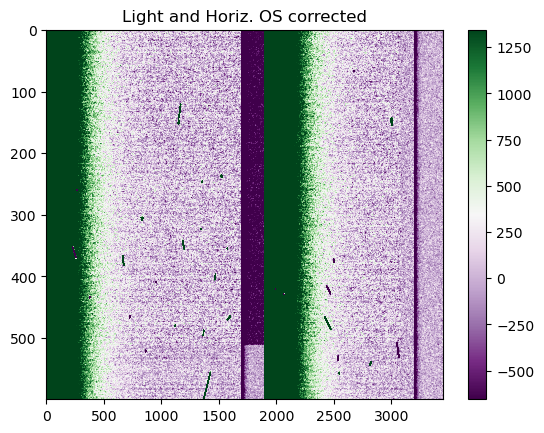

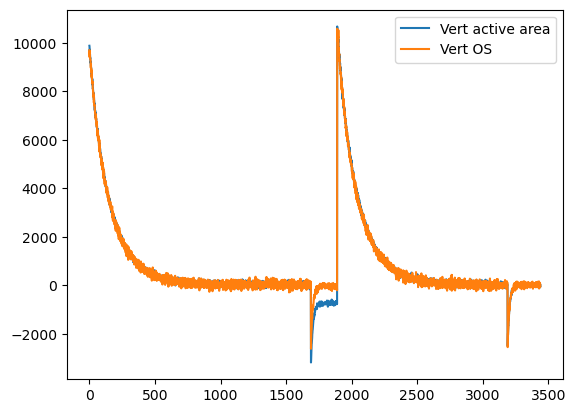

In [11]:
_ = doHOS(image, hos_start, ss_os_slice, ms_os_slice, ss_slices, ms_slices)
_light = doHOS_simple(light_calibration_image, hos_start)
plot_image(_, 1000, title='Horiz. OS corrected')
plt.plot(np.median(_[:vos_start], axis=0)[10:], label='Vert active area')
plt.plot(np.median(_[vos_start:], axis=0)[10:], label='Vert OS')
# plt.plot(np.median(_light[:vos_start], axis=0)[10:], label='light active area')
# plt.plot(np.median(_light[vos_start:], axis=0)[10:], label='light OS')
plt.legend()
plt.show();

plot_image(_ - _light, 1000, title='Light and Horiz. OS corrected')
plt.plot(np.median((_ - _light)[:vos_start], axis=0)[10:], label='Vert active area')
plt.plot(np.median((_ - _light)[vos_start:], axis=0)[10:], label='Vert OS')
plt.legend();

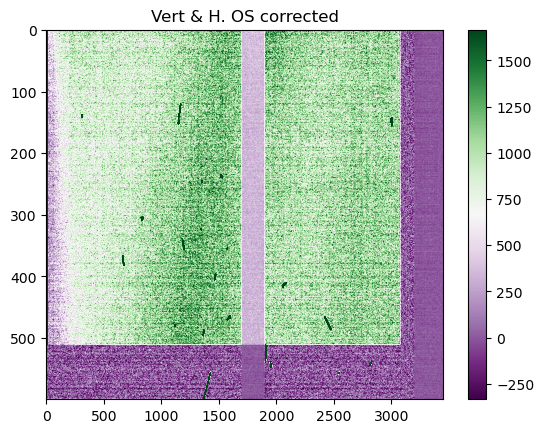

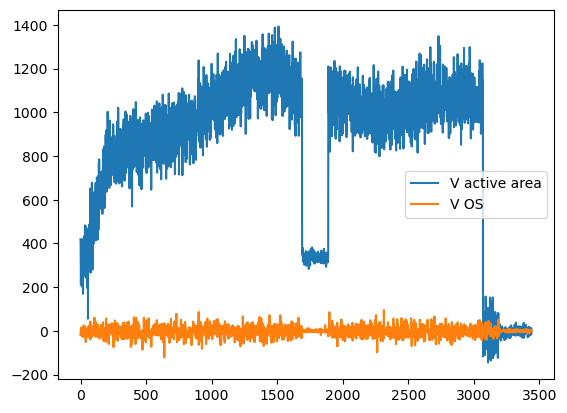

In [13]:
_ = doVHOS(image, hos_start, vos_start, ss_os_slice, ms_os_slice, ss_slices, ms_slices)
plot_image(_, 1000, title='Vert & H. OS corrected')
plt.plot(np.median(_[:vos_start], axis=0)[10:], label='V active area')
plt.plot(np.median(_[vos_start:], axis=0)[10:], label='V OS')
plt.legend();

In [21]:
def doSVHOS(image, hos_start, vos_start, ss_os_slice:slice, ms_os_slice:slice, ss_slices:list, ms_slices:list, NSAMP:int, gain_N1=1):
    vhos_image = doVHOS(image, hos_start, vos_start, ss_os_slice, ms_os_slice, ss_slices, ms_slices)
    gain_N = gain_N1 / np.sqrt(NSAMP)
    for ms_slice in ms_slices:
        vhos_image[:vos_start, ms_slice] += 765 #adu
#     vhos_image[:, ms_os_slice]  gain_N
    svhos_image = np.copy(vhos_image)
    return svhos_image

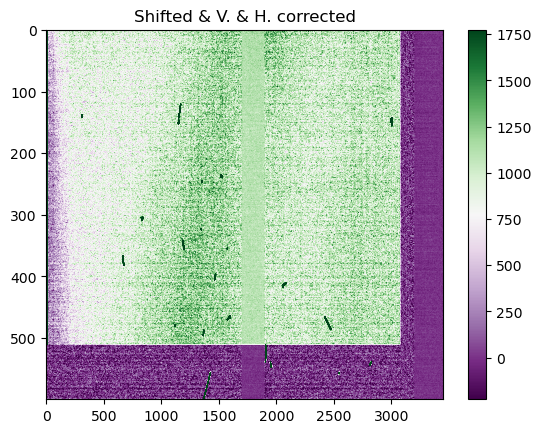

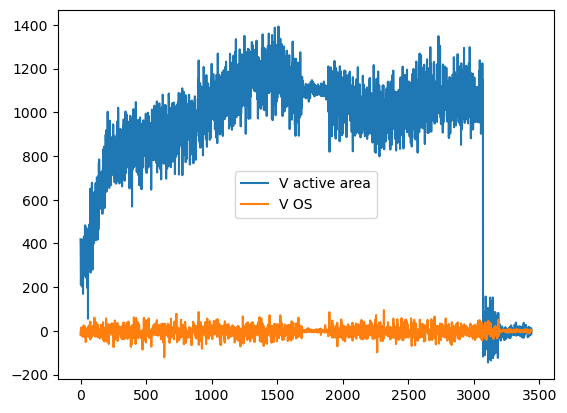

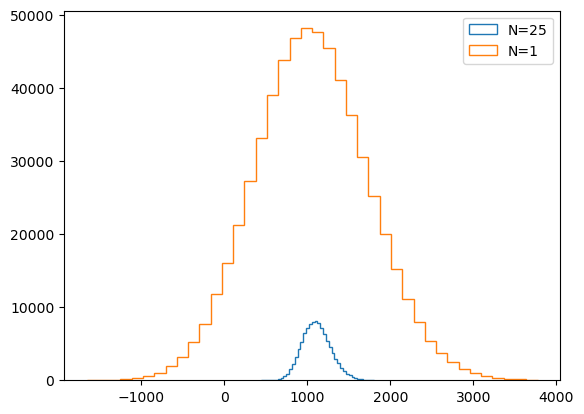

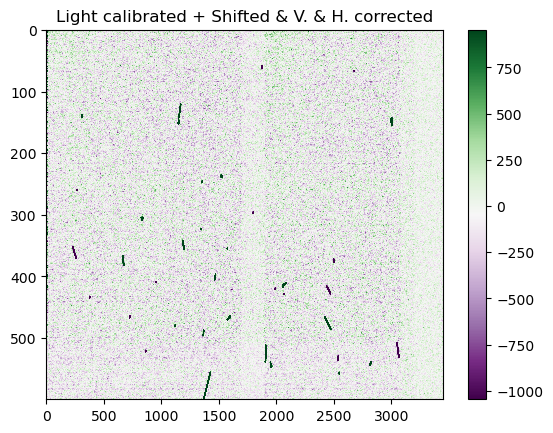

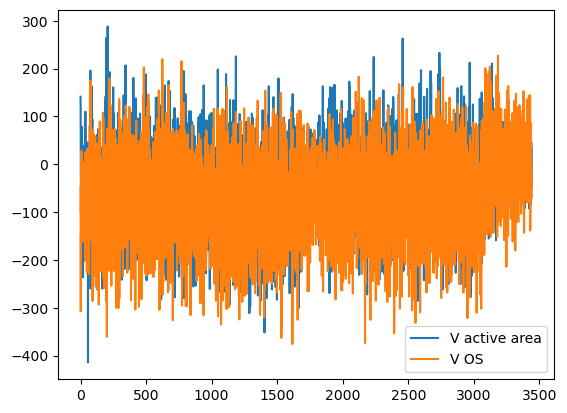

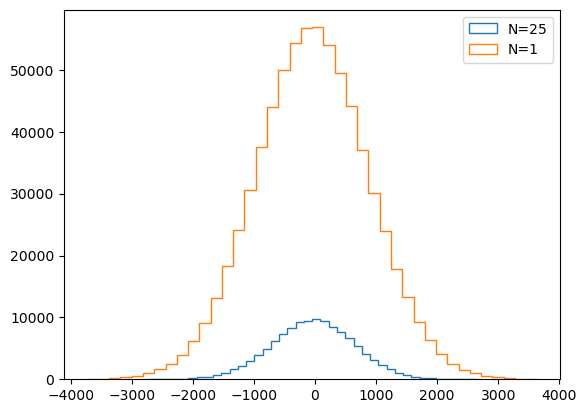

In [22]:
_ = doSVHOS(image,
                      hos_start,
                      vos_start,
                      ss_os_slice,
                      ms_os_slice,
                      ss_slices,
                      ms_slices,
                      NSAMP=NSAMP,
                      gain_N1=1
                     )
_light = doHOS_simple(light_calibration_image, hos_start)

plot_image(_, 1000, title='Shifted & V. & H. corrected')
plt.plot(np.median(_[:vos_start], axis=0)[10:], label='V active area')
plt.plot(np.median(_[vos_start:], axis=0)[10:], label='V OS')
plt.legend()
plt.show()

plt.hist(scipy.stats.sigmaclip(_[:vos_start, ms_slices[0]])[0], histtype='step', bins=40, label=f'N={NSAMP}')
plt.hist(scipy.stats.sigmaclip(_[:vos_start, ss_slices[1]])[0], histtype='step', bins=40, label='N=1')
plt.legend()
plt.show();

_ = (_ - light_calibration_image)
plot_image(_, 1000, title='Light calibrated + Shifted & V. & H. corrected')
plt.plot(np.median(_[:vos_start], axis=0)[10:], label='V active area')
plt.plot(np.median(_[vos_start:], axis=0)[10:], label='V OS')
plt.legend()
plt.show()

plt.hist(scipy.stats.sigmaclip(_[:, ms_slices[0]])[0], histtype='step', bins=40, label=f'N={NSAMP}')
plt.hist(scipy.stats.sigmaclip(_[:, ss_slices[1]])[0], histtype='step', bins=40, label='N=1')
plt.legend();
